# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data          ################ DONE

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature ) ############# DONE

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels). # DONE

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\hc\Documents\GitHub\AI-Q2-learning-resources\DLAssignments\data\Car Price Prediction\CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape # 205 records, 26 features

(205, 26)

In [5]:
# checking missing values
df.isnull().sum() # 0

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# cross checking
df.info() # no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# data has all the data (except car_id, and prediction target i.e. price)
# targets has all prediction target records

data = df.loc[:, 'symboling':'highwaympg'] # not including Car_ID because it plays no role in predicting price
targets = df.loc[:, 'price']

##  Shuffling Data

In [8]:
# shuffling data
# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

data = data.sample(frac=1).reset_index(drop=True) #  drop = True will prevent adding an index column
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,...,five,183,idi,3.58,3.640,21.5,123,4350,22,25
1,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,165.3,...,four,97,2bbl,3.15,3.290,9.4,69,5200,31,37
2,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,five,136,mpfi,3.19,3.400,8.5,110,5500,19,25
3,1,mitsubishi outlander,gas,turbo,four,sedan,fwd,front,96.3,172.4,...,four,110,spdi,3.17,3.460,7.5,116,5500,23,30
4,2,saab 99gle,gas,std,four,sedan,fwd,front,99.1,186.6,...,four,121,mpfi,3.54,3.070,9.3,110,5250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,five,131,mpfi,3.13,3.400,7.0,160,5500,16,22
201,3,mazda rx-7 gs,gas,std,two,hatchback,rwd,front,95.3,169.0,...,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23
202,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,170.7,...,six,181,mpfi,3.43,3.270,7.8,200,5200,17,23
203,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,171.7,...,four,97,idi,3.01,3.400,23.0,68,4500,37,42


## Splitting Data (Train, Test, Validate)

In [9]:
# Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


# 50 + 20 => 70 percent for training and validation NOOOOOOOOOO {this is for k fold validation which isnt the case here}


# 50 percent of 205 = 102
train_data = data.iloc[:102] ############# 0 based so end at 143 @!%$#&^$&!@$
train_targets = targets.iloc[:102]

# 20 percent of 205 = 41
validation_data = data.iloc[102: 143]
validation_targets = targets.iloc[102: 143]

# 30 percent for test
# 205 - 143 = 62
test_data = data.iloc[143:]
test_targets = targets.iloc[143:]

# cross checking
print('Data, Targets', end='\n\n')
print('TRAIN')
print(train_data.shape)
print(train_targets.shape)
print('#'*15)

print('VALIDATION')
print(validation_data.shape)
print(validation_targets.shape)
print('#'*15)

print('TEST')
print(test_data.shape)
print(test_targets.shape)


Data, Targets

TRAIN
(102, 24)
(102,)
###############
VALIDATION
(41, 24)
(41,)
###############
TEST
(62, 24)
(62,)


# Exploring Data

In [10]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,...,five,183,idi,3.58,3.64,21.5,123,4350,22,25
1,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,165.3,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
2,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
3,1,mitsubishi outlander,gas,turbo,four,sedan,fwd,front,96.3,172.4,...,four,110,spdi,3.17,3.46,7.5,116,5500,23,30
4,2,saab 99gle,gas,std,four,sedan,fwd,front,99.1,186.6,...,four,121,mpfi,3.54,3.07,9.3,110,5250,21,28


## Correlation - Feature Selection

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(15, 15))



# finding correaltion wrt training data, if found highly correlated columns, those columns
# can be removed from train, test, validate datasets altogehter --- no need to find
# correlation for test and validation datasets seperately

sns.heatmap(df.corr(method='spearman'), annot=True)

In [ ]:
### Based on the above heatmap, we can drop symboling, stroke, compressionratio, peakrpm, carheight

In [ ]:
# correlated_cols = ['symboling', 'stroke', 'compressionratio', 'peakrpm', 'carheight']

# train_data = train_data.drop(correlated_cols, axis = 'columns')

# validation_data = validation_data.drop(correlated_cols, axis = 'columns')

# test_data = test_data.drop(correlated_cols, axis = 'columns')

In [ ]:
train_data.info()

# EDA TODO

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
train_data.shape

(102, 24)

In [14]:
train_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25
1,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
2,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
3,1,mitsubishi outlander,gas,turbo,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30
4,2,saab 99gle,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2758,ohc,four,121,mpfi,3.54,3.07,9.3,110,5250,21,28


In [15]:
# the above plot makes no sense, we can further try by dividing cars according to company instead of model


# Preparing Data

In [16]:
train_data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

In [17]:
# one hot encoding

# bruteforce solution

In [18]:
filt = ['highwaympg', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 
       'horsepower', 'citympg', 'peakrpm', 'compressionratio', 'carheight', 'stroke']

train_data = train_data[filt]
validation_data = validation_data[filt]
test_data = test_data[filt]

train_data.shape

(102, 13)

In [19]:
# Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 
# unit & Output Layer 
# with activation function relu/tanh (check by experiment).

In [42]:
# normalization

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data-=mean
validation_data /= std

test_data-=mean
test_data /= std


In [115]:
# BUILDING MODEL
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(13, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(11, activation='relu')) ###
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu')) ###
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(4, activation='relu')) ###
model.add(layers.Dense(1))

In [116]:
# train_data.shape # 9 features
# test_data.shape # 9 features
# validation_data.shape # 9 features

In [117]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_79 (Dense)             (None, 11)                154       
_________________________________________________________________
dense_80 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_81 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_82 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_83 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_84 (Dense)             (None, 1)               

In [118]:
# COMPILING
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [119]:
# train_targets = np.array(train_targets)
# validation_targets = np.array(validation_targets)
# test_targets = np.array(test_targets)

In [120]:
# train_data = np.array(train_data)
# validation_data = np.array(validation_data)
# test_data = np.array(test_data)

In [121]:
val_data = validation_data
val_targets = validation_targets

val_data.shape
# val_targets.shape
# val_targets
val_targets.shape

(41,)

In [122]:
# FITTING
history = model.fit(train_data, train_targets, epochs=1100, batch_size=256, validation_data= (val_data, val_targets))

Train on 102 samples, validate on 41 samples
Epoch 1/1100
102/102 [==============================] - 0s 2ms/step - loss: 280094368.0000 - mae: 13788.3984 - val_loss: 280448576.0000 - val_mae: 14915.3320
Epoch 2/1100
102/102 [==============================] - 0s 20us/step - loss: 280093440.0000 - mae: 13788.3594 - val_loss: 280447840.0000 - val_mae: 14915.3105
Epoch 3/1100
102/102 [==============================] - 0s 29us/step - loss: 280092928.0000 - mae: 13788.3369 - val_loss: 280447456.0000 - val_mae: 14915.2988
Epoch 4/1100
102/102 [==============================] - 0s 29us/step - loss: 280092640.0000 - mae: 13788.3262 - val_loss: 280447200.0000 - val_mae: 14915.2900
Epoch 5/1100
102/102 [==============================] - 0s 39us/step - loss: 280092448.0000 - mae: 13788.3174 - val_loss: 280446976.0000 - val_mae: 14915.2832
Epoch 6/1100
102/102 [==============================] - 0s 29us/step - loss: 280092320.0000 - mae: 13788.3125 - val_loss: 280446816.0000 - val_mae: 14915.2773
Ep

Epoch 52/1100
102/102 [==============================] - 0s 20us/step - loss: 280084960.0000 - mae: 13788.0381 - val_loss: 280437824.0000 - val_mae: 14914.9756
Epoch 53/1100
102/102 [==============================] - 0s 29us/step - loss: 280084608.0000 - mae: 13788.0244 - val_loss: 280437440.0000 - val_mae: 14914.9639
Epoch 54/1100
102/102 [==============================] - 0s 20us/step - loss: 280084256.0000 - mae: 13788.0146 - val_loss: 280437056.0000 - val_mae: 14914.9463
Epoch 55/1100
102/102 [==============================] - 0s 20us/step - loss: 280083936.0000 - mae: 13788.0010 - val_loss: 280436576.0000 - val_mae: 14914.9346
Epoch 56/1100
102/102 [==============================] - 0s 29us/step - loss: 280083584.0000 - mae: 13787.9873 - val_loss: 280436160.0000 - val_mae: 14914.9189
Epoch 57/1100
102/102 [==============================] - 0s 29us/step - loss: 280083200.0000 - mae: 13787.9727 - val_loss: 280435712.0000 - val_mae: 14914.9023
Epoch 58/1100
102/102 [=================

Epoch 104/1100
102/102 [==============================] - 0s 29us/step - loss: 280043360.0000 - mae: 13786.4990 - val_loss: 280385280.0000 - val_mae: 14913.2275
Epoch 105/1100
102/102 [==============================] - 0s 20us/step - loss: 280041824.0000 - mae: 13786.4414 - val_loss: 280383328.0000 - val_mae: 14913.1631
Epoch 106/1100
102/102 [==============================] - 0s 20us/step - loss: 280040192.0000 - mae: 13786.3828 - val_loss: 280381280.0000 - val_mae: 14913.0947
Epoch 107/1100
102/102 [==============================] - 0s 29us/step - loss: 280038560.0000 - mae: 13786.3223 - val_loss: 280379232.0000 - val_mae: 14913.0264
Epoch 108/1100
102/102 [==============================] - 0s 20us/step - loss: 280036864.0000 - mae: 13786.2607 - val_loss: 280377056.0000 - val_mae: 14912.9541
Epoch 109/1100
102/102 [==============================] - 0s 29us/step - loss: 280035136.0000 - mae: 13786.1963 - val_loss: 280374880.0000 - val_mae: 14912.8809
Epoch 110/1100
102/102 [==========

Epoch 155/1100
102/102 [==============================] - 0s 29us/step - loss: 279885248.0000 - mae: 13780.7100 - val_loss: 280183648.0000 - val_mae: 14906.5410
Epoch 156/1100
102/102 [==============================] - 0s 29us/step - loss: 279879936.0000 - mae: 13780.5146 - val_loss: 280176800.0000 - val_mae: 14906.3145
Epoch 157/1100
102/102 [==============================] - 0s 29us/step - loss: 279874464.0000 - mae: 13780.3154 - val_loss: 280169760.0000 - val_mae: 14906.0840
Epoch 158/1100
102/102 [==============================] - 0s 20us/step - loss: 279868864.0000 - mae: 13780.1104 - val_loss: 280162624.0000 - val_mae: 14905.8447
Epoch 159/1100
102/102 [==============================] - 0s 20us/step - loss: 279863168.0000 - mae: 13779.9033 - val_loss: 280155296.0000 - val_mae: 14905.6035
Epoch 160/1100
102/102 [==============================] - 0s 29us/step - loss: 279857344.0000 - mae: 13779.6885 - val_loss: 280147808.0000 - val_mae: 14905.3535
Epoch 161/1100
102/102 [==========

Epoch 206/1100
102/102 [==============================] - 0s 29us/step - loss: 279407200.0000 - mae: 13763.2842 - val_loss: 279568608.0000 - val_mae: 14886.1055
Epoch 207/1100
102/102 [==============================] - 0s 29us/step - loss: 279392128.0000 - mae: 13762.7373 - val_loss: 279549312.0000 - val_mae: 14885.4639
Epoch 208/1100
102/102 [==============================] - 0s 29us/step - loss: 279376768.0000 - mae: 13762.1797 - val_loss: 279529632.0000 - val_mae: 14884.8066
Epoch 209/1100
102/102 [==============================] - 0s 20us/step - loss: 279361088.0000 - mae: 13761.6123 - val_loss: 279509600.0000 - val_mae: 14884.1387
Epoch 210/1100
102/102 [==============================] - 0s 29us/step - loss: 279345184.0000 - mae: 13761.0342 - val_loss: 279489184.0000 - val_mae: 14883.4570
Epoch 211/1100
102/102 [==============================] - 0s 29us/step - loss: 279328928.0000 - mae: 13760.4453 - val_loss: 279468320.0000 - val_mae: 14882.7656
Epoch 212/1100
102/102 [==========

Epoch 257/1100
102/102 [==============================] - 0s 108us/step - loss: 278168768.0000 - mae: 13718.2363 - val_loss: 277970016.0000 - val_mae: 14832.7207
Epoch 258/1100
102/102 [==============================] - 0s 20us/step - loss: 278132256.0000 - mae: 13716.9082 - val_loss: 277922880.0000 - val_mae: 14831.1406
Epoch 259/1100
102/102 [==============================] - 0s 20us/step - loss: 278095200.0000 - mae: 13715.5566 - val_loss: 277874976.0000 - val_mae: 14829.5352
Epoch 260/1100
102/102 [==============================] - 0s 29us/step - loss: 278057568.0000 - mae: 13714.1836 - val_loss: 277826272.0000 - val_mae: 14827.9023
Epoch 261/1100
102/102 [==============================] - 0s 20us/step - loss: 278019360.0000 - mae: 13712.7891 - val_loss: 277776832.0000 - val_mae: 14826.2441
Epoch 262/1100
102/102 [==============================] - 0s 20us/step - loss: 277980512.0000 - mae: 13711.3711 - val_loss: 277726560.0000 - val_mae: 14824.5605
Epoch 263/1100
102/102 [=========

Epoch 308/1100
102/102 [==============================] - 0s 29us/step - loss: 275389344.0000 - mae: 13616.4023 - val_loss: 274373760.0000 - val_mae: 14711.5107
Epoch 309/1100
102/102 [==============================] - 0s 29us/step - loss: 275311808.0000 - mae: 13613.5488 - val_loss: 274273472.0000 - val_mae: 14708.1143
Epoch 310/1100
102/102 [==============================] - 0s 20us/step - loss: 275233248.0000 - mae: 13610.6553 - val_loss: 274171840.0000 - val_mae: 14704.6660
Epoch 311/1100
102/102 [==============================] - 0s 29us/step - loss: 275153632.0000 - mae: 13607.7246 - val_loss: 274068832.0000 - val_mae: 14701.1738
Epoch 312/1100
102/102 [==============================] - 0s 20us/step - loss: 275072896.0000 - mae: 13604.7500 - val_loss: 273964320.0000 - val_mae: 14697.6309
Epoch 313/1100
102/102 [==============================] - 0s 20us/step - loss: 274991072.0000 - mae: 13601.7354 - val_loss: 273858496.0000 - val_mae: 14694.0400
Epoch 314/1100
102/102 [==========

Epoch 359/1100
102/102 [==============================] - 0s 20us/step - loss: 269821568.0000 - mae: 13409.4814 - val_loss: 267158784.0000 - val_mae: 14464.3340
Epoch 360/1100
102/102 [==============================] - 0s 20us/step - loss: 269673504.0000 - mae: 13403.9189 - val_loss: 266966784.0000 - val_mae: 14457.6816
Epoch 361/1100
102/102 [==============================] - 0s 20us/step - loss: 269523616.0000 - mae: 13398.2891 - val_loss: 266772448.0000 - val_mae: 14450.9453
Epoch 362/1100
102/102 [==============================] - 0s 20us/step - loss: 269372032.0000 - mae: 13392.5908 - val_loss: 266575920.0000 - val_mae: 14444.1250
Epoch 363/1100
102/102 [==============================] - 0s 29us/step - loss: 269218688.0000 - mae: 13386.8213 - val_loss: 266377040.0000 - val_mae: 14437.2236
Epoch 364/1100
102/102 [==============================] - 0s 29us/step - loss: 269063520.0000 - mae: 13380.9805 - val_loss: 266175856.0000 - val_mae: 14430.2344
Epoch 365/1100
102/102 [==========

Epoch 410/1100
102/102 [==============================] - 0s 29us/step - loss: 259715680.0000 - mae: 13022.5371 - val_loss: 254059376.0000 - val_mae: 14000.9395
Epoch 411/1100
102/102 [==============================] - 0s 20us/step - loss: 259458416.0000 - mae: 13012.4824 - val_loss: 253726096.0000 - val_mae: 13988.8887
Epoch 412/1100
102/102 [==============================] - 0s 20us/step - loss: 259198576.0000 - mae: 13002.3184 - val_loss: 253389552.0000 - val_mae: 13976.7070
Epoch 413/1100
102/102 [==============================] - 0s 29us/step - loss: 258936224.0000 - mae: 12992.0439 - val_loss: 253049632.0000 - val_mae: 13964.3906
Epoch 414/1100
102/102 [==============================] - 0s 29us/step - loss: 258671248.0000 - mae: 12981.6572 - val_loss: 252706416.0000 - val_mae: 13951.9375
Epoch 415/1100
102/102 [==============================] - 0s 20us/step - loss: 258403712.0000 - mae: 12971.1572 - val_loss: 252359856.0000 - val_mae: 13939.3486
Epoch 416/1100
102/102 [==========

Epoch 461/1100
102/102 [==============================] - 0s 20us/step - loss: 243041856.0000 - mae: 12347.3398 - val_loss: 232483584.0000 - val_mae: 13190.7168
Epoch 462/1100
102/102 [==============================] - 0s 20us/step - loss: 242636960.0000 - mae: 12330.2920 - val_loss: 231960432.0000 - val_mae: 13170.2422
Epoch 463/1100
102/102 [==============================] - 0s 29us/step - loss: 242228864.0000 - mae: 12313.0771 - val_loss: 231433136.0000 - val_mae: 13149.5674
Epoch 464/1100
102/102 [==============================] - 0s 29us/step - loss: 241817552.0000 - mae: 12295.6914 - val_loss: 230901792.0000 - val_mae: 13128.6875
Epoch 465/1100
102/102 [==============================] - 0s 186us/step - loss: 241403088.0000 - mae: 12278.1387 - val_loss: 230366384.0000 - val_mae: 13107.6035
Epoch 466/1100
102/102 [==============================] - 0s 29us/step - loss: 240985408.0000 - mae: 12260.4102 - val_loss: 229826880.0000 - val_mae: 13086.3125
Epoch 467/1100
102/102 [=========

Epoch 512/1100
102/102 [==============================] - 0s 20us/step - loss: 218326832.0000 - mae: 11287.5654 - val_loss: 200650896.0000 - val_mae: 11864.3242
Epoch 513/1100
102/102 [==============================] - 0s 20us/step - loss: 217762000.0000 - mae: 11264.0293 - val_loss: 199926240.0000 - val_mae: 11835.7861
Epoch 514/1100
102/102 [==============================] - 0s 29us/step - loss: 217194288.0000 - mae: 11240.2900 - val_loss: 199198144.0000 - val_mae: 11806.9980
Epoch 515/1100
102/102 [==============================] - 0s 29us/step - loss: 216623872.0000 - mae: 11216.3477 - val_loss: 198466608.0000 - val_mae: 11777.9629
Epoch 516/1100
102/102 [==============================] - 0s 29us/step - loss: 216050560.0000 - mae: 11192.1963 - val_loss: 197731680.0000 - val_mae: 11748.6758
Epoch 517/1100
102/102 [==============================] - 0s 20us/step - loss: 215474576.0000 - mae: 11167.8398 - val_loss: 196993392.0000 - val_mae: 11719.1348
Epoch 518/1100
102/102 [==========

Epoch 563/1100
102/102 [==============================] - 0s 235us/step - loss: 186689040.0000 - mae: 10058.4453 - val_loss: 160386032.0000 - val_mae: 10155.4492
Epoch 564/1100
102/102 [==============================] - 0s 20us/step - loss: 186033248.0000 - mae: 10034.4307 - val_loss: 159561984.0000 - val_mae: 10128.0059
Epoch 565/1100
102/102 [==============================] - 0s 69us/step - loss: 185377184.0000 - mae: 10010.2314 - val_loss: 158738384.0000 - val_mae: 10100.3574
Epoch 566/1100
102/102 [==============================] - 0s 20us/step - loss: 184720960.0000 - mae: 9985.8496 - val_loss: 157915392.0000 - val_mae: 10072.5010
Epoch 567/1100
102/102 [==============================] - 0s 20us/step - loss: 184064624.0000 - mae: 9961.2998 - val_loss: 157093024.0000 - val_mae: 10044.4336
Epoch 568/1100
102/102 [==============================] - 0s 29us/step - loss: 183408240.0000 - mae: 9938.3711 - val_loss: 156271488.0000 - val_mae: 10016.1582
Epoch 569/1100
102/102 [============

Epoch 615/1100
102/102 [==============================] - 0s 29us/step - loss: 153953408.0000 - mae: 8868.2646 - val_loss: 120942680.0000 - val_mae: 8807.9678
Epoch 616/1100
102/102 [==============================] - 0s 20us/step - loss: 153387328.0000 - mae: 8849.8340 - val_loss: 120307152.0000 - val_mae: 8783.8916
Epoch 617/1100
102/102 [==============================] - 0s 29us/step - loss: 152825136.0000 - mae: 8831.2959 - val_loss: 119678040.0000 - val_mae: 8759.6729
Epoch 618/1100
102/102 [==============================] - 0s 29us/step - loss: 152267008.0000 - mae: 8812.6562 - val_loss: 119055712.0000 - val_mae: 8735.3252
Epoch 619/1100
102/102 [==============================] - 0s 29us/step - loss: 151712992.0000 - mae: 8794.1670 - val_loss: 118440408.0000 - val_mae: 8710.8564
Epoch 620/1100
102/102 [==============================] - 0s 20us/step - loss: 151163152.0000 - mae: 8778.0898 - val_loss: 117832264.0000 - val_mae: 8686.2656
Epoch 621/1100
102/102 [======================

Epoch 667/1100
102/102 [==============================] - 0s 29us/step - loss: 130538576.0000 - mae: 8329.1016 - val_loss: 98337832.0000 - val_mae: 7628.7690
Epoch 668/1100
102/102 [==============================] - 0s 29us/step - loss: 130216952.0000 - mae: 8324.5664 - val_loss: 98116728.0000 - val_mae: 7616.5220
Epoch 669/1100
102/102 [==============================] - 0s 20us/step - loss: 129901296.0000 - mae: 8320.0195 - val_loss: 97903928.0000 - val_mae: 7605.2227
Epoch 670/1100
102/102 [==============================] - 0s 20us/step - loss: 129591544.0000 - mae: 8315.4600 - val_loss: 97699424.0000 - val_mae: 7594.9175
Epoch 671/1100
102/102 [==============================] - 0s 29us/step - loss: 129287712.0000 - mae: 8310.8877 - val_loss: 97503120.0000 - val_mae: 7585.0474
Epoch 672/1100
102/102 [==============================] - 0s 29us/step - loss: 128989776.0000 - mae: 8306.2979 - val_loss: 97314928.0000 - val_mae: 7575.2188
Epoch 673/1100
102/102 [============================

Epoch 719/1100
102/102 [==============================] - 0s 20us/step - loss: 120611576.0000 - mae: 8190.8345 - val_loss: 94024288.0000 - val_mae: 7370.3789
Epoch 720/1100
102/102 [==============================] - 0s 29us/step - loss: 120504200.0000 - mae: 8189.0171 - val_loss: 93981680.0000 - val_mae: 7370.3696
Epoch 721/1100
102/102 [==============================] - 0s 20us/step - loss: 120397856.0000 - mae: 8187.1230 - val_loss: 93938248.0000 - val_mae: 7370.2612
Epoch 722/1100
102/102 [==============================] - 0s 20us/step - loss: 120292512.0000 - mae: 8185.1538 - val_loss: 93894048.0000 - val_mae: 7370.0571
Epoch 723/1100
102/102 [==============================] - 0s 20us/step - loss: 120188128.0000 - mae: 8183.1187 - val_loss: 93849104.0000 - val_mae: 7369.7622
Epoch 724/1100
102/102 [==============================] - 0s 29us/step - loss: 120084568.0000 - mae: 8181.0195 - val_loss: 93803448.0000 - val_mae: 7369.3789
Epoch 725/1100
102/102 [============================

Epoch 771/1100
102/102 [==============================] - 0s 20us/step - loss: 115616008.0000 - mae: 8046.9775 - val_loss: 90705000.0000 - val_mae: 7258.0928
Epoch 772/1100
102/102 [==============================] - 0s 78us/step - loss: 115522880.0000 - mae: 8043.7095 - val_loss: 90618368.0000 - val_mae: 7254.0894
Epoch 773/1100
102/102 [==============================] - 0s 29us/step - loss: 115429720.0000 - mae: 8040.4277 - val_loss: 90530880.0000 - val_mae: 7250.0396
Epoch 774/1100
102/102 [==============================] - 0s 29us/step - loss: 115336544.0000 - mae: 8037.1138 - val_loss: 90443792.0000 - val_mae: 7245.9785
Epoch 775/1100
102/102 [==============================] - 0s 29us/step - loss: 115243336.0000 - mae: 8033.8037 - val_loss: 90354664.0000 - val_mae: 7241.8413
Epoch 776/1100
102/102 [==============================] - 0s 20us/step - loss: 115150104.0000 - mae: 8030.4253 - val_loss: 90268848.0000 - val_mae: 7237.7681
Epoch 777/1100
102/102 [============================

Epoch 823/1100
102/102 [==============================] - 0s 29us/step - loss: 110796568.0000 - mae: 7886.4067 - val_loss: 85911592.0000 - val_mae: 7051.3735
Epoch 824/1100
102/102 [==============================] - 0s 29us/step - loss: 110704800.0000 - mae: 7877.8291 - val_loss: 85921576.0000 - val_mae: 7055.6929
Epoch 825/1100
102/102 [==============================] - 0s 29us/step - loss: 110612984.0000 - mae: 7881.1079 - val_loss: 85722192.0000 - val_mae: 7044.1348
Epoch 826/1100
102/102 [==============================] - 0s 20us/step - loss: 110521384.0000 - mae: 7872.2173 - val_loss: 85736896.0000 - val_mae: 7049.7529
Epoch 827/1100
102/102 [==============================] - 0s 29us/step - loss: 110429536.0000 - mae: 7876.3813 - val_loss: 85522192.0000 - val_mae: 7037.0991
Epoch 828/1100
102/102 [==============================] - 0s 29us/step - loss: 110337032.0000 - mae: 7866.6294 - val_loss: 85551232.0000 - val_mae: 7043.8271
Epoch 829/1100
102/102 [============================

Epoch 875/1100
102/102 [==============================] - 0s 29us/step - loss: 106045240.0000 - mae: 7737.3652 - val_loss: 81014056.0000 - val_mae: 6876.2651
Epoch 876/1100
102/102 [==============================] - 0s 39us/step - loss: 105955816.0000 - mae: 7726.8452 - val_loss: 81060480.0000 - val_mae: 6882.2319
Epoch 877/1100
102/102 [==============================] - 0s 29us/step - loss: 105866304.0000 - mae: 7730.9756 - val_loss: 80831000.0000 - val_mae: 6869.2144
Epoch 878/1100
102/102 [==============================] - 0s 29us/step - loss: 105777184.0000 - mae: 7720.4062 - val_loss: 80879128.0000 - val_mae: 6875.2007
Epoch 879/1100
102/102 [==============================] - 0s 29us/step - loss: 105687960.0000 - mae: 7724.5220 - val_loss: 80649440.0000 - val_mae: 6862.1831
Epoch 880/1100
102/102 [==============================] - 0s 29us/step - loss: 105599128.0000 - mae: 7713.9692 - val_loss: 80697968.0000 - val_mae: 6868.0996
Epoch 881/1100
102/102 [============================

Epoch 927/1100
102/102 [==============================] - 0s 29us/step - loss: 101540896.0000 - mae: 7568.5850 - val_loss: 76434488.0000 - val_mae: 6685.2788
Epoch 928/1100
102/102 [==============================] - 0s 20us/step - loss: 101457376.0000 - mae: 7558.6997 - val_loss: 76488888.0000 - val_mae: 6689.7256
Epoch 929/1100
102/102 [==============================] - 0s 29us/step - loss: 101373888.0000 - mae: 7561.7700 - val_loss: 76262216.0000 - val_mae: 6677.4321
Epoch 930/1100
102/102 [==============================] - 0s 29us/step - loss: 101290816.0000 - mae: 7551.9248 - val_loss: 76316176.0000 - val_mae: 6681.8340
Epoch 931/1100
102/102 [==============================] - 0s 29us/step - loss: 101207408.0000 - mae: 7554.9229 - val_loss: 76089384.0000 - val_mae: 6669.5830
Epoch 932/1100
102/102 [==============================] - 0s 20us/step - loss: 101124264.0000 - mae: 7545.1025 - val_loss: 76139320.0000 - val_mae: 6673.6641
Epoch 933/1100
102/102 [============================

Epoch 980/1100
102/102 [==============================] - 0s 29us/step - loss: 97235296.0000 - mae: 7362.8872 - val_loss: 72199640.0000 - val_mae: 6487.5703
Epoch 981/1100
102/102 [==============================] - 0s 20us/step - loss: 97159000.0000 - mae: 7365.2637 - val_loss: 71985416.0000 - val_mae: 6472.6382
Epoch 982/1100
102/102 [==============================] - 0s 29us/step - loss: 97083048.0000 - mae: 7355.2734 - val_loss: 72050416.0000 - val_mae: 6480.9702
Epoch 983/1100
102/102 [==============================] - 0s 20us/step - loss: 97007024.0000 - mae: 7357.8320 - val_loss: 71836768.0000 - val_mae: 6466.0732
Epoch 984/1100
102/102 [==============================] - 0s 29us/step - loss: 96931336.0000 - mae: 7347.8511 - val_loss: 71902600.0000 - val_mae: 6474.3970
Epoch 985/1100
102/102 [==============================] - 0s 29us/step - loss: 96855584.0000 - mae: 7350.3623 - val_loss: 71689056.0000 - val_mae: 6459.5283
Epoch 986/1100
102/102 [==============================] - 

Epoch 1032/1100
102/102 [==============================] - 0s 20us/step - loss: 93596872.0000 - mae: 7186.9570 - val_loss: 68656536.0000 - val_mae: 6325.4849
Epoch 1033/1100
102/102 [==============================] - 0s 20us/step - loss: 93534576.0000 - mae: 7196.3037 - val_loss: 68459760.0000 - val_mae: 6307.6729
Epoch 1034/1100
102/102 [==============================] - 0s 20us/step - loss: 93472696.0000 - mae: 7182.2236 - val_loss: 68533152.0000 - val_mae: 6319.8530
Epoch 1035/1100
102/102 [==============================] - 0s 20us/step - loss: 93410848.0000 - mae: 7192.6060 - val_loss: 68339824.0000 - val_mae: 6302.0576
Epoch 1036/1100
102/102 [==============================] - 0s 20us/step - loss: 93349408.0000 - mae: 7178.4429 - val_loss: 68413360.0000 - val_mae: 6314.1943
Epoch 1037/1100
102/102 [==============================] - 0s 20us/step - loss: 93287968.0000 - mae: 7188.9307 - val_loss: 68219288.0000 - val_mae: 6296.4121
Epoch 1038/1100
102/102 [===========================

Epoch 1084/1100
102/102 [==============================] - 0s 29us/step - loss: 90676040.0000 - mae: 7085.9536 - val_loss: 65919964.0000 - val_mae: 6198.6782
Epoch 1085/1100
102/102 [==============================] - 0s 20us/step - loss: 90627384.0000 - mae: 7097.1826 - val_loss: 65747912.0000 - val_mae: 6177.4604
Epoch 1086/1100
102/102 [==============================] - 0s 39us/step - loss: 90579288.0000 - mae: 7082.2251 - val_loss: 65830420.0000 - val_mae: 6195.5098
Epoch 1087/1100
102/102 [==============================] - 0s 29us/step - loss: 90531136.0000 - mae: 7093.3438 - val_loss: 65659204.0000 - val_mae: 6174.2373
Epoch 1088/1100
102/102 [==============================] - 0s 20us/step - loss: 90483560.0000 - mae: 7078.3462 - val_loss: 65742372.0000 - val_mae: 6192.2837
Epoch 1089/1100
102/102 [==============================] - 0s 20us/step - loss: 90435936.0000 - mae: 7089.4565 - val_loss: 65572152.0000 - val_mae: 6170.9941
Epoch 1090/1100
102/102 [===========================

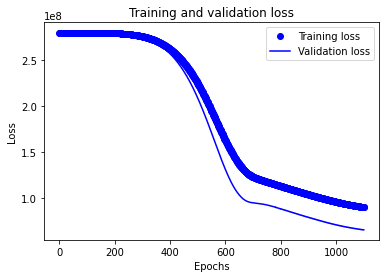

In [123]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()